In [2]:
import cv2
print(cv2.__version__)

4.7.0


In [3]:
import matplotlib.pyplot as plt 
import numpy as np

#image reading from file

In [5]:
Img_Ori= cv2.imread('lenna.jpg',1)
Img_Ori.shape
# 500*500*3 三个通道RGB

(500, 500, 3)

In [6]:
#显示图片
cv2.imshow('Lenna_photo',Img_Ori)
key = cv2.waitKey(0)
if key == 27:
    cv2.destroyAllWindows()

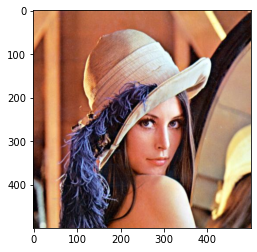

In [8]:
plt.imshow(cv2.cvtColor(Img_Ori,cv2.COLOR_BGR2RGB))
plt.show()

In [9]:
plt.rcParams

RcParams({'_internal.classic_mode': False,
          'agg.path.chunksize': 0,
          'animation.bitrate': -1,
          'animation.codec': 'h264',
          'animation.convert_args': [],
          'animation.convert_path': 'convert',
          'animation.embed_limit': 20.0,
          'animation.ffmpeg_args': [],
          'animation.ffmpeg_path': 'ffmpeg',
          'animation.frame_format': 'png',
          'animation.html': 'none',
          'animation.writer': 'ffmpeg',
          'axes.autolimit_mode': 'data',
          'axes.axisbelow': 'line',
          'axes.edgecolor': 'black',
          'axes.facecolor': 'white',
          'axes.formatter.limits': [-5, 6],
          'axes.formatter.min_exponent': 0,
          'axes.formatter.offset_threshold': 4,
          'axes.formatter.use_locale': False,
          'axes.formatter.use_mathtext': False,
          'axes.formatter.useoffset': True,
          'axes.grid': False,
          'axes.grid.axis': 'both',
          'axes.grid.which':

In [10]:
def my_show(img,size=(3,3)):
    plt.figure(figsize= size)
    plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
    plt.show()

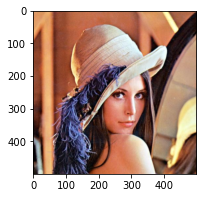

In [11]:
my_show(Img_Ori)

Image Crop

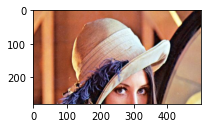

In [15]:
my_show(Img_Ori[10:300][10:300])

channel split

In [16]:
B,G,R =  cv2.split(Img_Ori)

In [17]:
cv2.imshow('B',B)
cv2.imshow('G',G)
cv2.imshow('R',R)
key = cv2.waitKey(0)
if key == 27:
    cv2.destroyAllWindows()

In [20]:
def img_cooler(img,b_increase,r_decrease):
    B,G,R =  cv2.split(img)
    b_lim = 255 - b_increase
    B[B>b_lim] =255
    B[B<=b_lim] = (b_increase + B[B<=b_lim])

    r_lim = r_decrease
    R[R>r_lim] = 0
    R[R>=r_lim] = (R[R>=r_lim] - r_decrease)
    return cv2.merge((B,G,R))

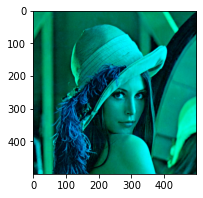

In [26]:
cooler_image = img_cooler(Img_Ori,5,10)
my_show(cooler_image)

Gamma Change

In [27]:
def adjust_gamma(img,gamma=1.0):
    invGamma = 1.0/gamma
    table = []
    for i in range(256):
        table.append(((i/255.0)**invGamma)*255)
    table = np.array(table).astype('uint8')
    return cv2.LUT(img,table)

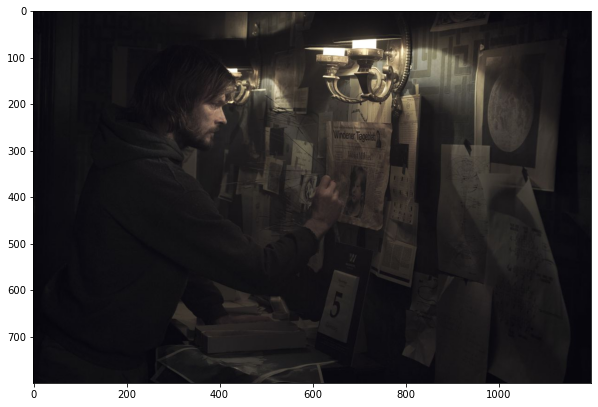

In [28]:
img_dark = cv2.imread('dark.jpg',1)
my_show(img_dark,size=(10,10))

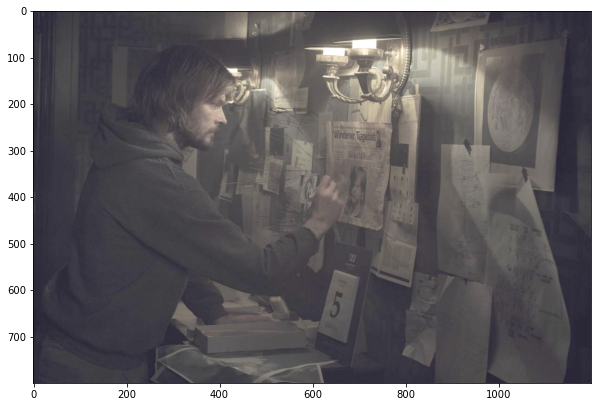

In [35]:
img_brighter = adjust_gamma(img_dark,2)
my_show(img_brighter,size=(10,10))

#直方图均衡！！

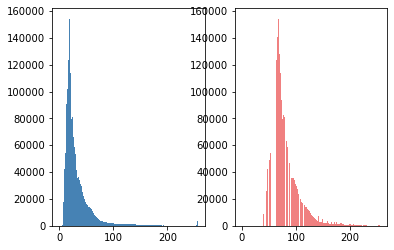

In [42]:
plt.subplot(121)
plt.hist(img_dark.flatten(),256,[0,256],color = 'steelblue')
plt.subplot(122)
plt.hist(img_brighter.flatten(),256,[0,256],color = 'lightcoral')
plt.show()

YUV 色彩空间的Y进行直方图均衡 调亮图片


In [46]:
img_yuv = cv2.cvtColor(img_dark,cv2.COLOR_BGR2YUV)
img_yuv[:,:,0] = cv2.equalizeHist(img_yuv[:,:,0])
img_output = cv2.cvtColor(img_yuv,cv2.COLOR_YUV2BGR)

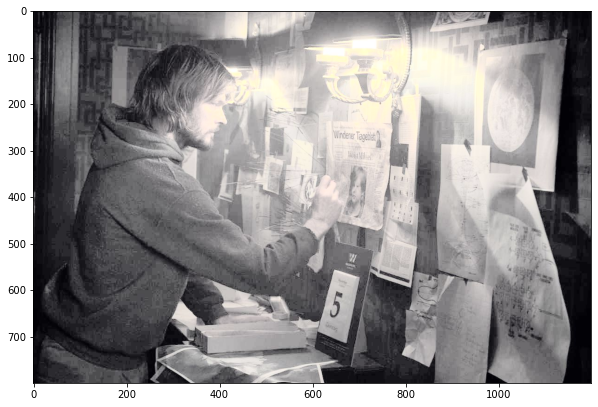

In [48]:
my_show(img_output,size=(10,10))